In [5]:
from normals_unet_v1_stock import *
from src.loader.normals_loader import prep_long_2_right_up
import matplotlib.pyplot as plt


In [3]:
device = "cuda:0"
tl, vl, test = get_loaders_param(prep_long_2_right_up)
model, optimizer, scheduler = get_model_and_optimizer(device)

torch.Size([4, 64, 1024]) torch.Size([4, 3, 64, 1024])
(64, 1024, 2)


/tmp/ipykernel_5827/639608173.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  vinputs = torch.tensor(vinputs).to(device=device, dtype=torch.float)
/tmp/ipykernel_5827/639608173.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  vlabels = torch.tensor(vlabels).to(device=device, dtype=torch.int)


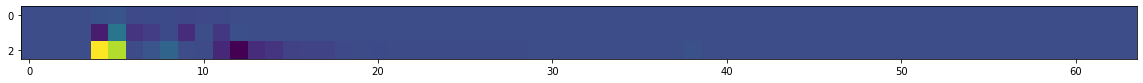

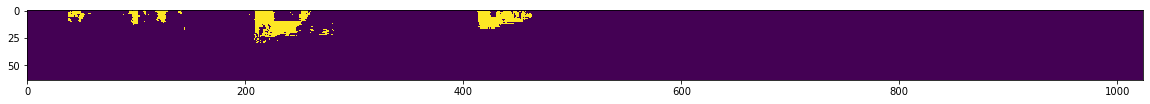

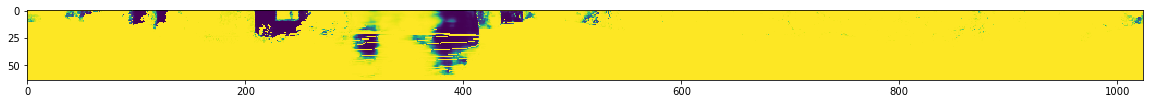

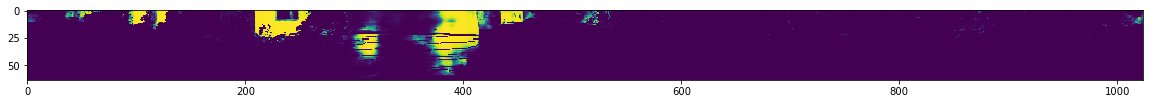

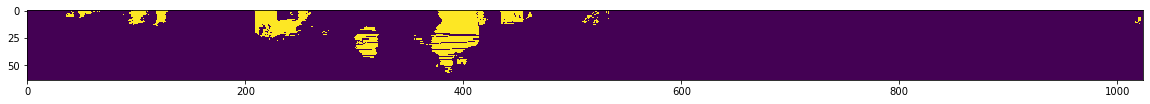

In [10]:
model.load_state_dict(torch.load("chpt/model_simple_normals_long_2_cross_up_right_unet_20230406_172753_19"))
model.train(False)
model.to(device)
vinputs, vlabels = next(iter(test))
plt.figure(figsize=(20,80))
plt.imshow(vinputs[0][:,:, 4])
plt.figure(figsize=(20,80))
plt.imshow(vlabels[0])

print(vlabels.shape, vinputs.shape)
vinputs = torch.tensor(vinputs).to(device=device, dtype=torch.float)
vlabels = torch.tensor(vlabels).to(device=device, dtype=torch.int)
# 201

voutputs = model(vinputs)
print(voutputs[0].cpu().permute(1,2,0).detach().numpy().squeeze().shape)
plt.figure(figsize=(20,80))
plt.imshow(F.softmax(voutputs, dim=1)[0].cpu().permute(1,2,0).detach().numpy().squeeze()[:,:, 0])
plt.figure(figsize=(20,80))
plt.imshow(F.softmax(voutputs, dim=1)[0].cpu().permute(1,2,0).detach().numpy().squeeze()[:,:, 1])
plt.figure(figsize=(20,80))
plt.imshow(F.softmax(voutputs, dim=1)[0].cpu().permute(1,2,0).detach().numpy().squeeze()[:,:, 1].round().astype('int'))
